# Question 5

In [ ]:
# ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rcparams = {'axes.facecolor': "#F5F5DC"}
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', rc=rcparams)

In [ ]:
# ignore
df_archetype_predictions_joined = pd.read_csv('../data/MovieSummaries/archetype_predictions_joined.csv')
df_movie_processed = pd.read_csv('../data/MovieSummaries/movie_processed.csv') 
df_character_processed = pd.read_csv('../data/MovieSummaries/character_processed.csv') 

In [ ]:
# ignore
df_archetype_predictions_joined.head()

,Unnamed: 0,prediction,original_response,character_name,movie_name,movie_fb_id,actor_fb_id,model
0,0,Mentor / Wise Guide,Mentor / Wise Guide,Umeko Tsuda,Leonie,/m/05zr2p5,/m/0c7tjc,gpt-3.5-turbo
1,1,Rogue / Trickster / Con Artist,Rogue / Trickster / Con Artist,'2-Gun' Gertie Baxter,Roxie Hart,/m/026l5ym,/m/049wny,gpt-4o
2,2,Rogue / Trickster / Con Artist,Rogue / Trickster / Con Artist,'A.J.' Furnival,The Groom Wore Spurs,/m/05nszz2,/m/0h7dd,gpt-3.5-turbo
3,3,Warrior / Vigilante,Warrior / Vigilante,'Ace' Cooper,The Dude Bandit,/m/07s5z0d,/m/05ddzx,gpt-3.5-turbo
4,4,Warrior / Vigilante,Warrior / Vigilante,'Baby Face' Martin,Dead End,/m/0gnrt,/m/03n6r,gpt-4o


In [ ]:
# ignore
df_movie_processed.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,languages,movie_release_date,countries_old,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,['english'],2001-08-24,['United States of America'],['United States of America'],"['Thriller', 'Science Fiction', 'Action', 'Wes..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,['english'],2000-02-16,['United States of America'],['United States of America'],"['Drama', 'Mystery', 'Crime', 'Biography']"
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,['norwegian'],1988-01-01,['Norway'],['Norway'],"['Drama', 'Crime']"
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,['english'],1987-01-01,['United Kingdom'],['United Kingdom'],"['Thriller', 'Erotic']"
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,['german'],1983-01-01,['Germany'],['Germany'],['Drama']


In [ ]:
# ignore
df_character_processed.head()

,Wikipedia movie ID,Freebase movie ID,Character name,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,actor_date_of_birth,movie_release_date,ethn_name,race
0,975900,/m/03vyhn,Akooshay,F,1.620,NaN,Wanda De Jesus,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958-08-26,2001-08-24,NaN,NaN
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,F,1.780,/m/044038p,Natasha Henstridge,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974-08-15,2001-08-24,NaN,NaN
2,975900,/m/03vyhn,Desolation Williams,M,1.727,/m/0x67,Ice Cube,/m/0jys3g,/m/0bgchn_,/m/01vw26l,1969-06-15,2001-08-24,African American,African
3,975900,/m/03vyhn,Sgt Jericho Butler,M,1.750,NaN,Jason Statham,/m/02vchl6,/m/0bgchnq,/m/034hyc,1967-09-12,2001-08-24,NaN,NaN
4,975900,/m/03vyhn,Bashira Kincaid,F,1.650,NaN,Clea DuVall,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1977-09-25,2001-08-24,NaN,NaN


In [ ]:
# ignore
def analyze_actor_archetypes(actor_fb_id, df_archetype, df_movie, df_character):
    """
    Analyze archetypes for a specific actor across their movies
    """
    actor_name = df_character[df_character['Freebase actor ID'] == actor_fb_id]['Actor name'].iloc[0] if not df_character[df_character['Freebase actor ID'] == actor_fb_id].empty else actor_fb_id
    
    actor_movies = df_archetype[df_archetype['actor_fb_id'].str.contains(actor_fb_id, case=False, na=False)]
    
    actor_movies_detailed = actor_movies.merge(
        df_movie, 
        left_on='movie_fb_id', 
        right_on='Freebase movie ID', 
        how='left'
    )
    
    actor_movies_detailed = actor_movies_detailed.sort_values('movie_release_date')
    
    actor_movies_detailed['actor_name'] = actor_name
    
    return actor_movies_detailed

In [ ]:
# ignore
def plot_actor_archetypes(actor_fb_id, df_archetype, df_movie, df_character):
    """
    Create a visualization of actor's archetypes over time
    """
    actor_data = analyze_actor_archetypes(actor_fb_id, df_archetype, df_movie, df_character)
    
    if actor_data.empty:
        print(f"No data found for actor: {actor_fb_id}")
        return
    
    actor_name = actor_data['actor_name'].iloc[0]
    
    plt.figure(figsize=(12, 6), dpi=300)
    
    plt.plot(
        actor_data['movie_release_date'], 
        actor_data['prediction'], 
        color='black', 
        linewidth=1, 
        linestyle='--',
        zorder=1
    )
    
    plt.scatter(
        actor_data['movie_release_date'], 
        actor_data['prediction'], 
        label='Prediction Archetype', 
        color='red', 
        marker='^',
        s=120,
        zorder=2
    )
    
    plt.title(f'Archetypes for {actor_name} Over Time', fontsize=25)
    plt.xlabel('Movie Release Year', fontsize=25)
    plt.ylabel('Archetype', fontsize=25)
    plt.legend(fontsize=20)
    plt.grid(True, alpha=0.7)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.tight_layout()
    plt.show()


### small test

In [ ]:
# ignore
actor_data = analyze_actor_archetypes(
    '/m/06_3lt', 
    df_archetype=df_archetype_predictions_joined, 
    df_movie=df_movie_processed,
    df_character=df_character_processed
    )

In [ ]:
# ignore
actor_data

,Unnamed: 0,prediction,original_response,character_name,movie_name,movie_fb_id,actor_fb_id,model,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,languages,movie_release_date,countries_old,countries,genres,actor_name
2,57155,Caregiver / Healer,Caregiver / Healer,Mrs. Douglas,That Was Then... This Is Now,/m/04jvgb,/m/06_3lt,gpt-4o,1223359,/m/04jvgb,That Was Then... This Is Now,8630068.0,101.0,['english'],1985-11-08,['United States of America'],['United States of America'],"['Drama', 'Teen']",Barbara Babcock
0,6478,Other,Other,Barbara Corvin,Space Cowboys,/m/05r3qc,/m/06_3lt,gpt-4o,1722156,/m/05r3qc,Space Cowboys,128884132.0,124.0,['english'],2000-08-01,"['Australia', 'United States of America']","['Australia', 'United States of America']","['Thriller', 'Drama', 'Science Fiction', 'Acti...",Barbara Babcock
1,55352,Rogue / Trickster / Con Artist,Rogue / Trickster / Con Artist,Molly,Home Alone 4,/m/02xcsf,/m/06_3lt,gpt-4o,619956,/m/02xcsf,Home Alone 4,NaN,84.0,['english'],2002-11-03,['United States of America'],['United States of America'],"['Family', 'Comedy', 'Christmas', 'Holiday', '...",Barbara Babcock


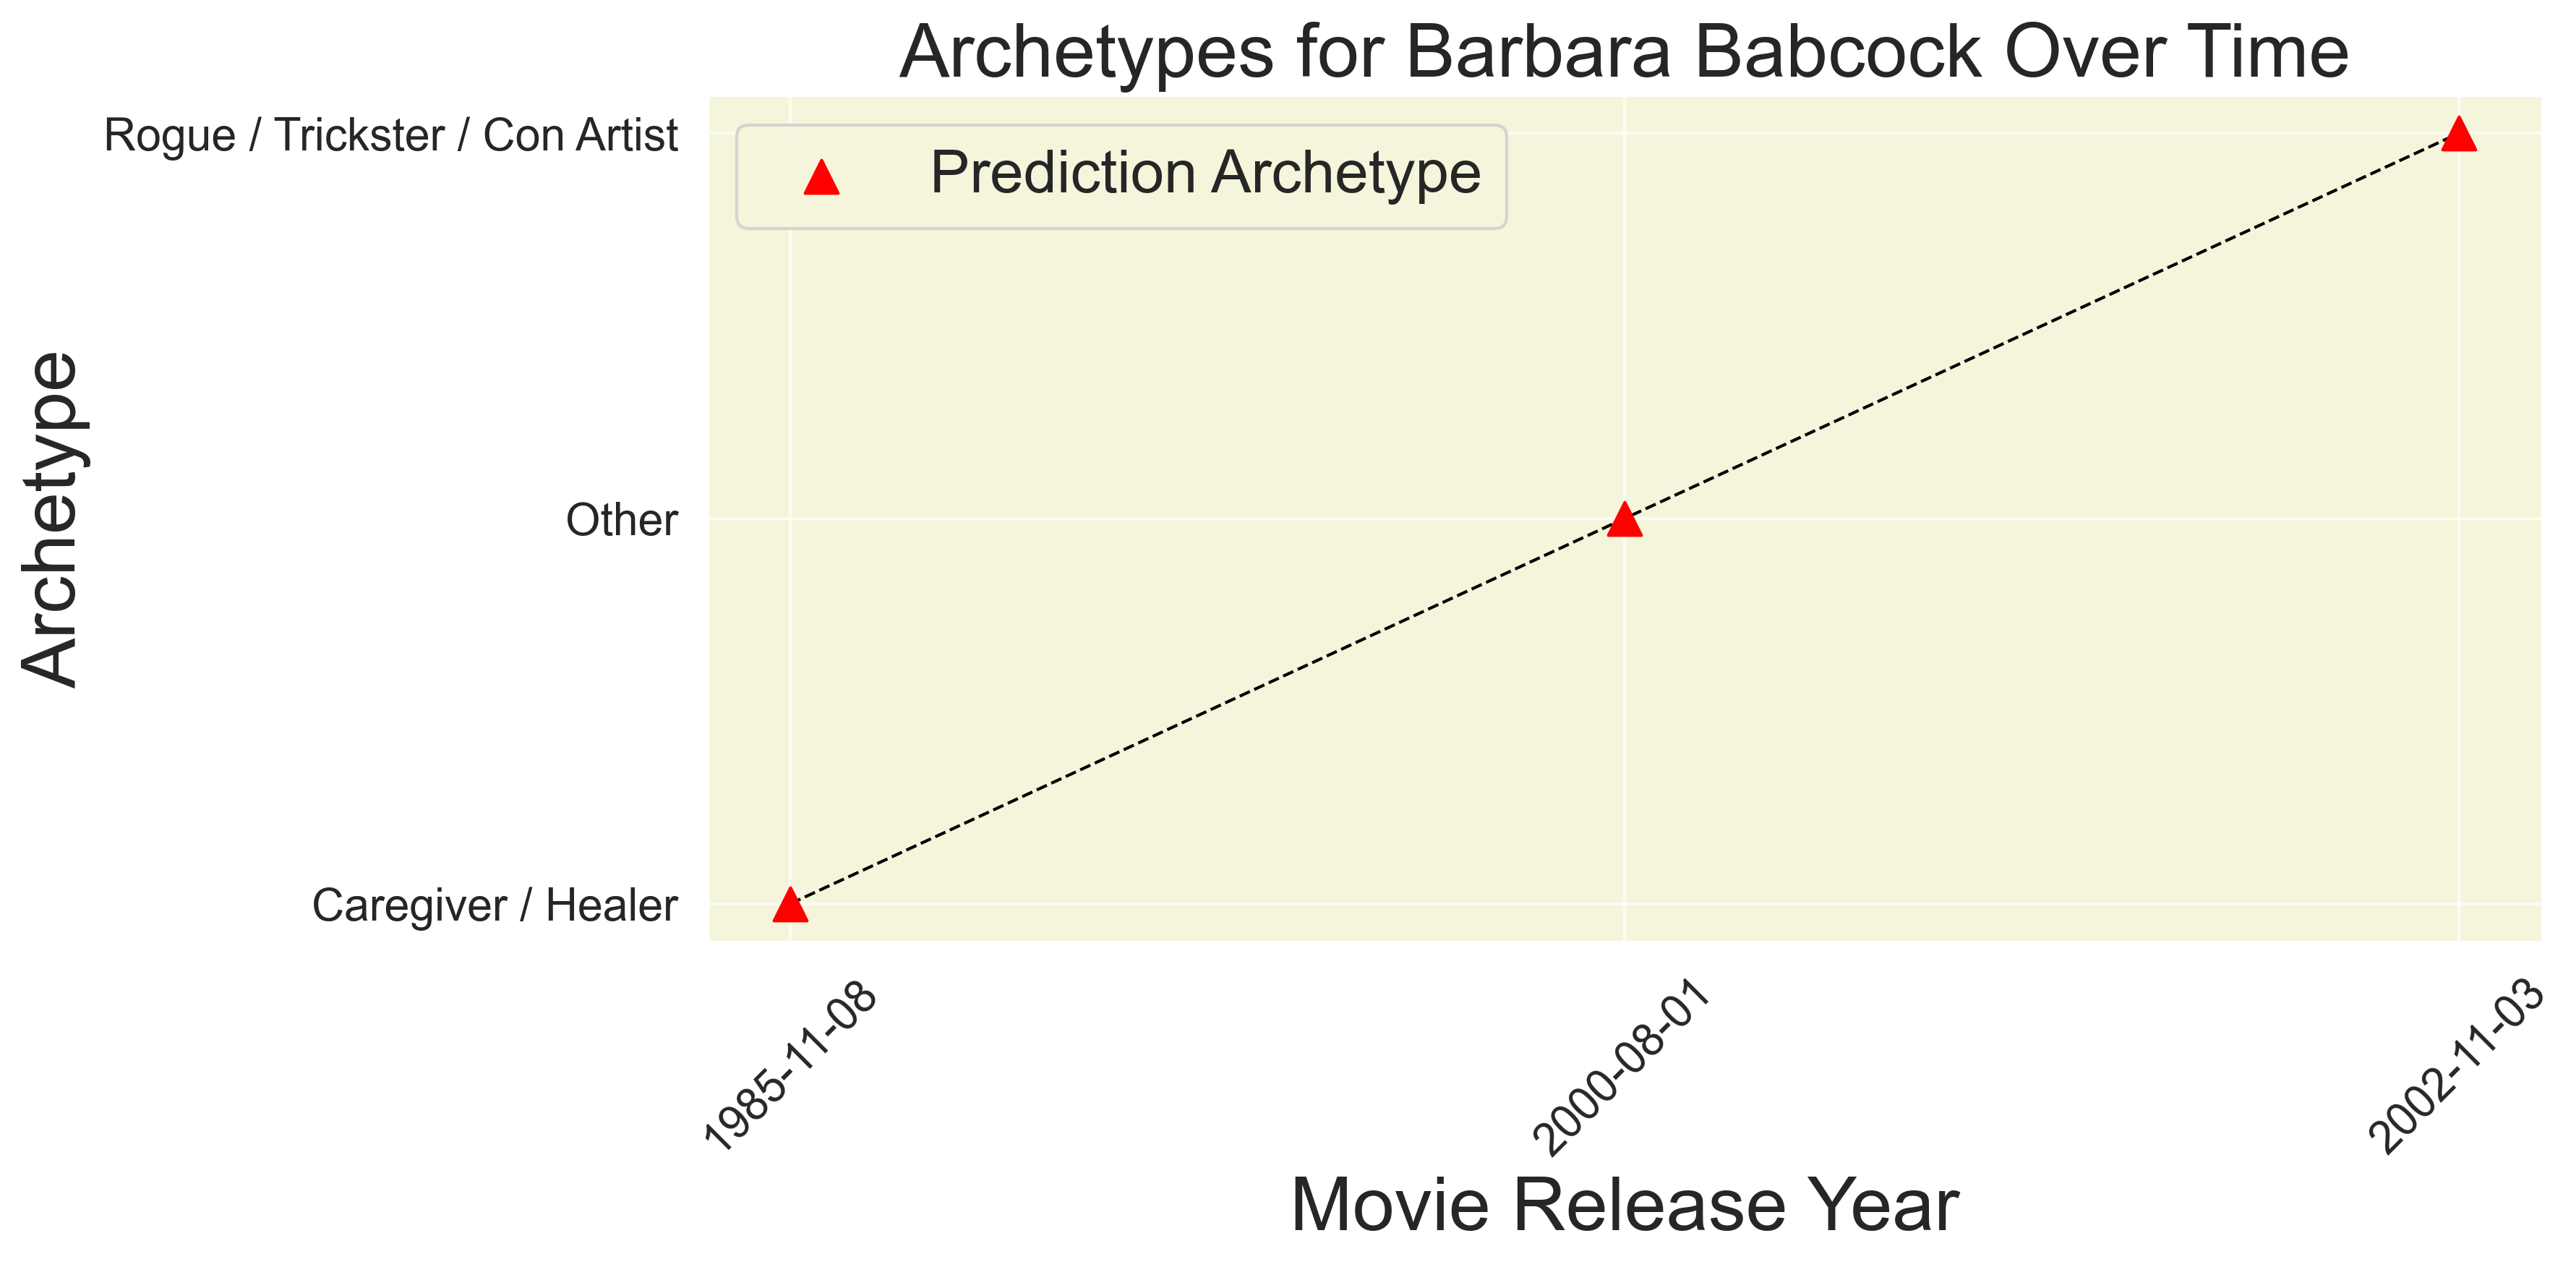

In [ ]:
# ignore
plot_actor_archetypes(
    '/m/06_3lt', 
    df_archetype=df_archetype_predictions_joined, 
    df_movie=df_movie_processed,
    df_character=df_character_processed
    )

## more actors

In [ ]:
# ignore
num_actors = 100
actor_fb_id_list = df_archetype_predictions_joined['actor_fb_id'].head(num_actors).tolist()

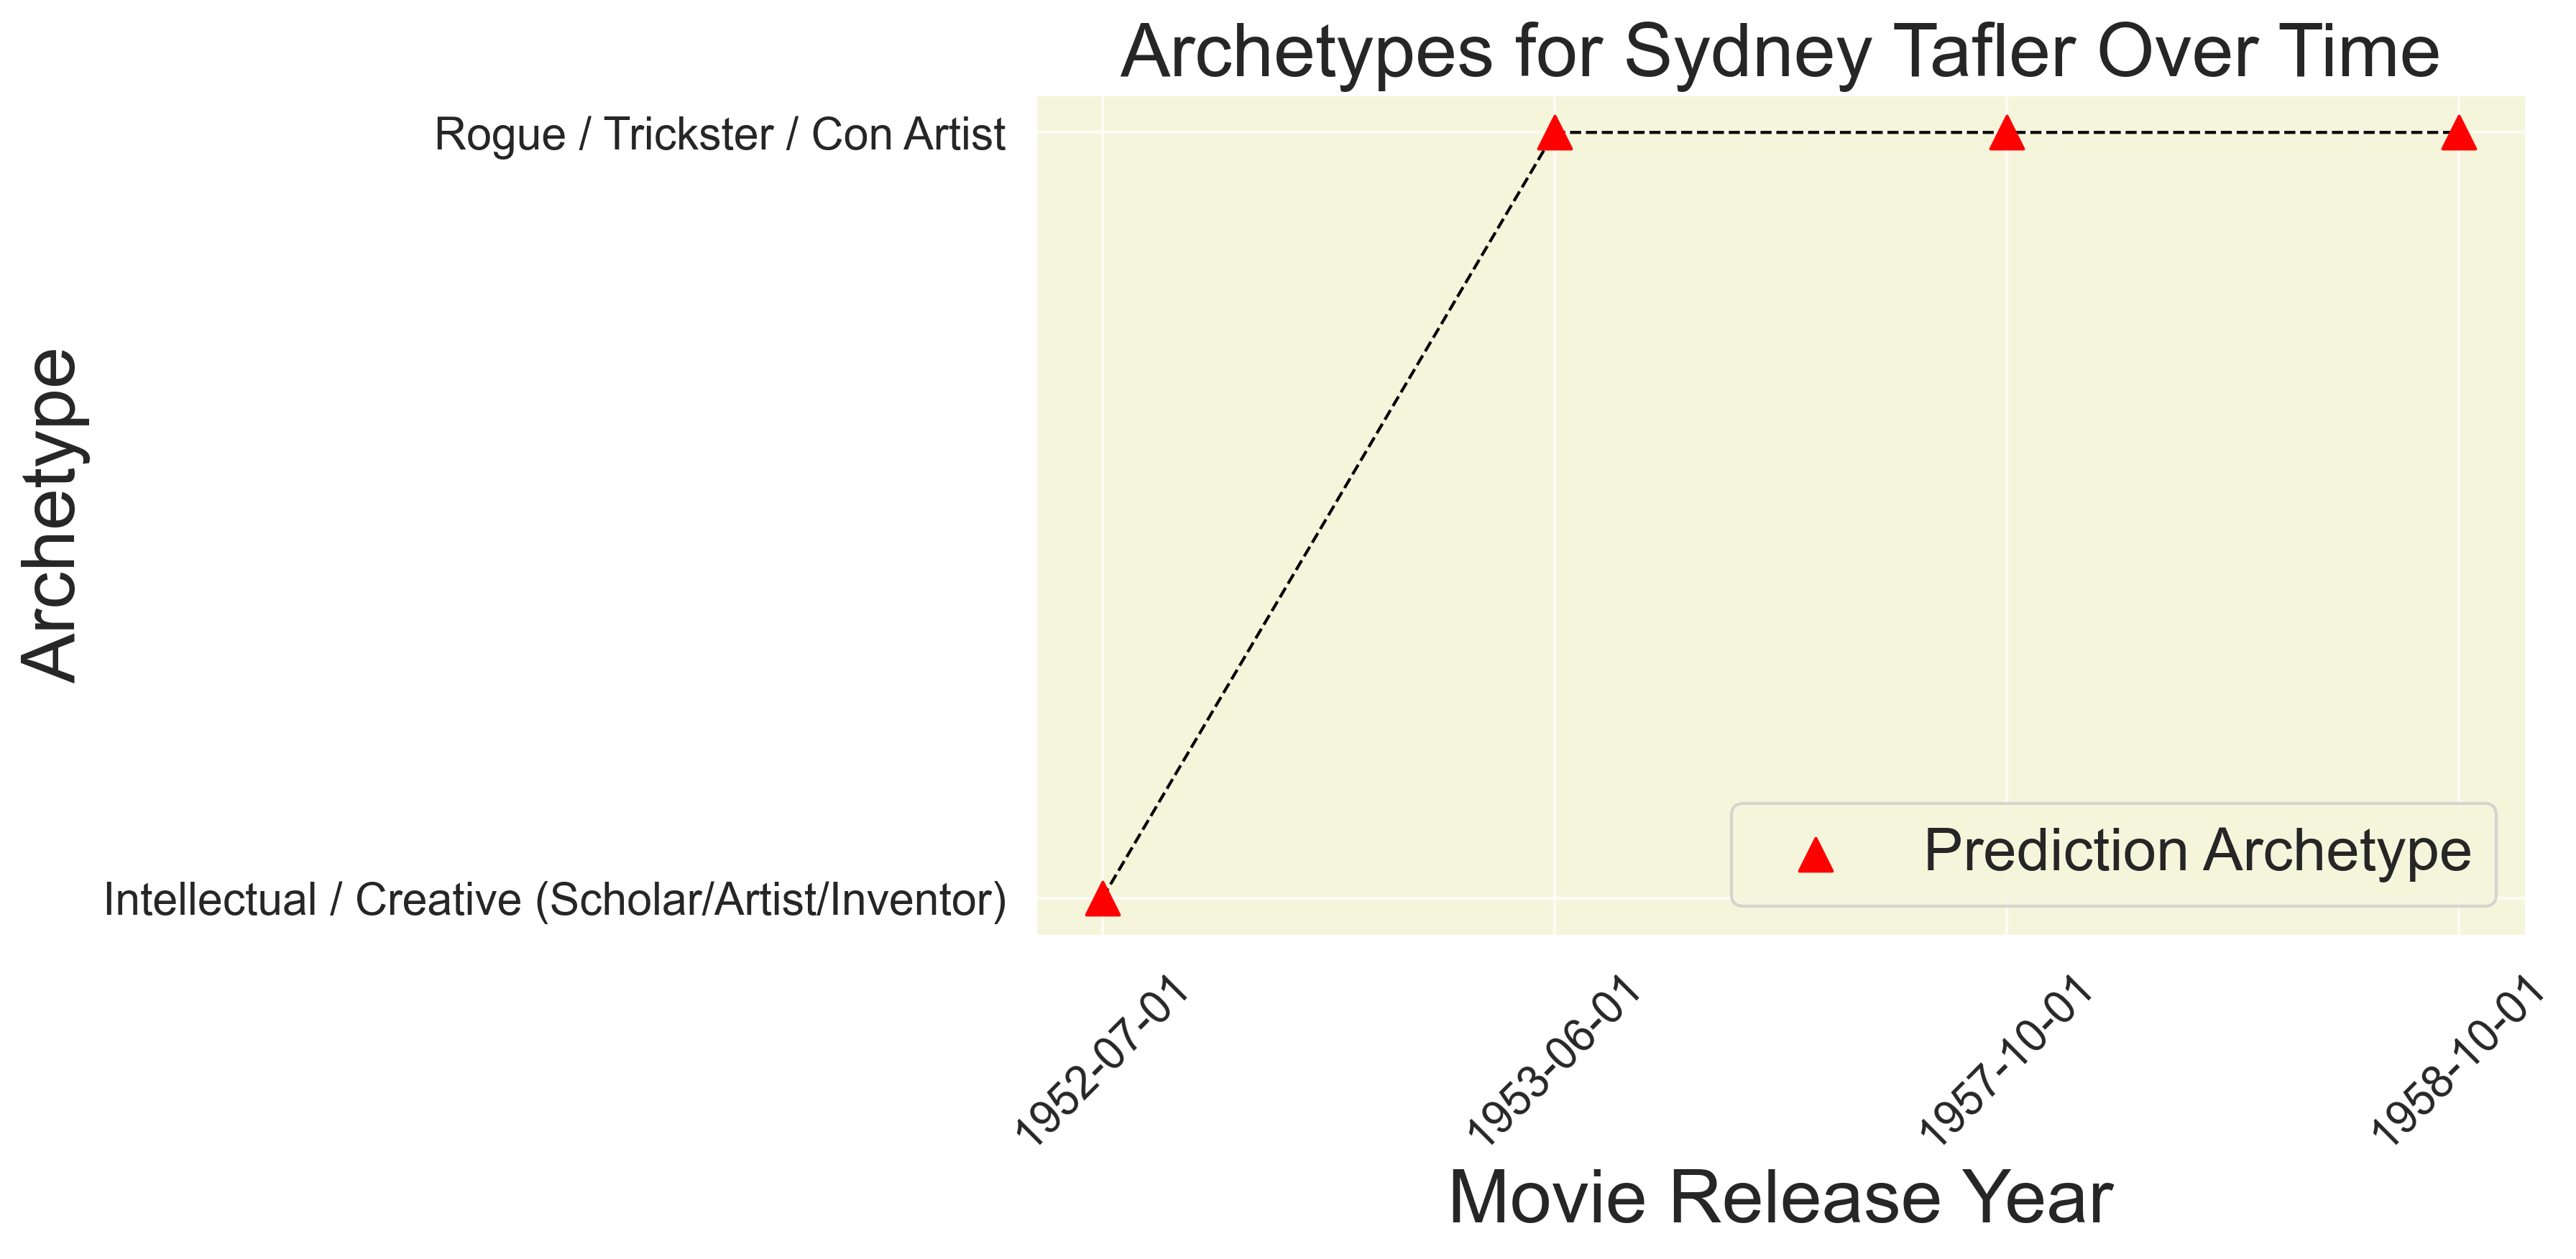

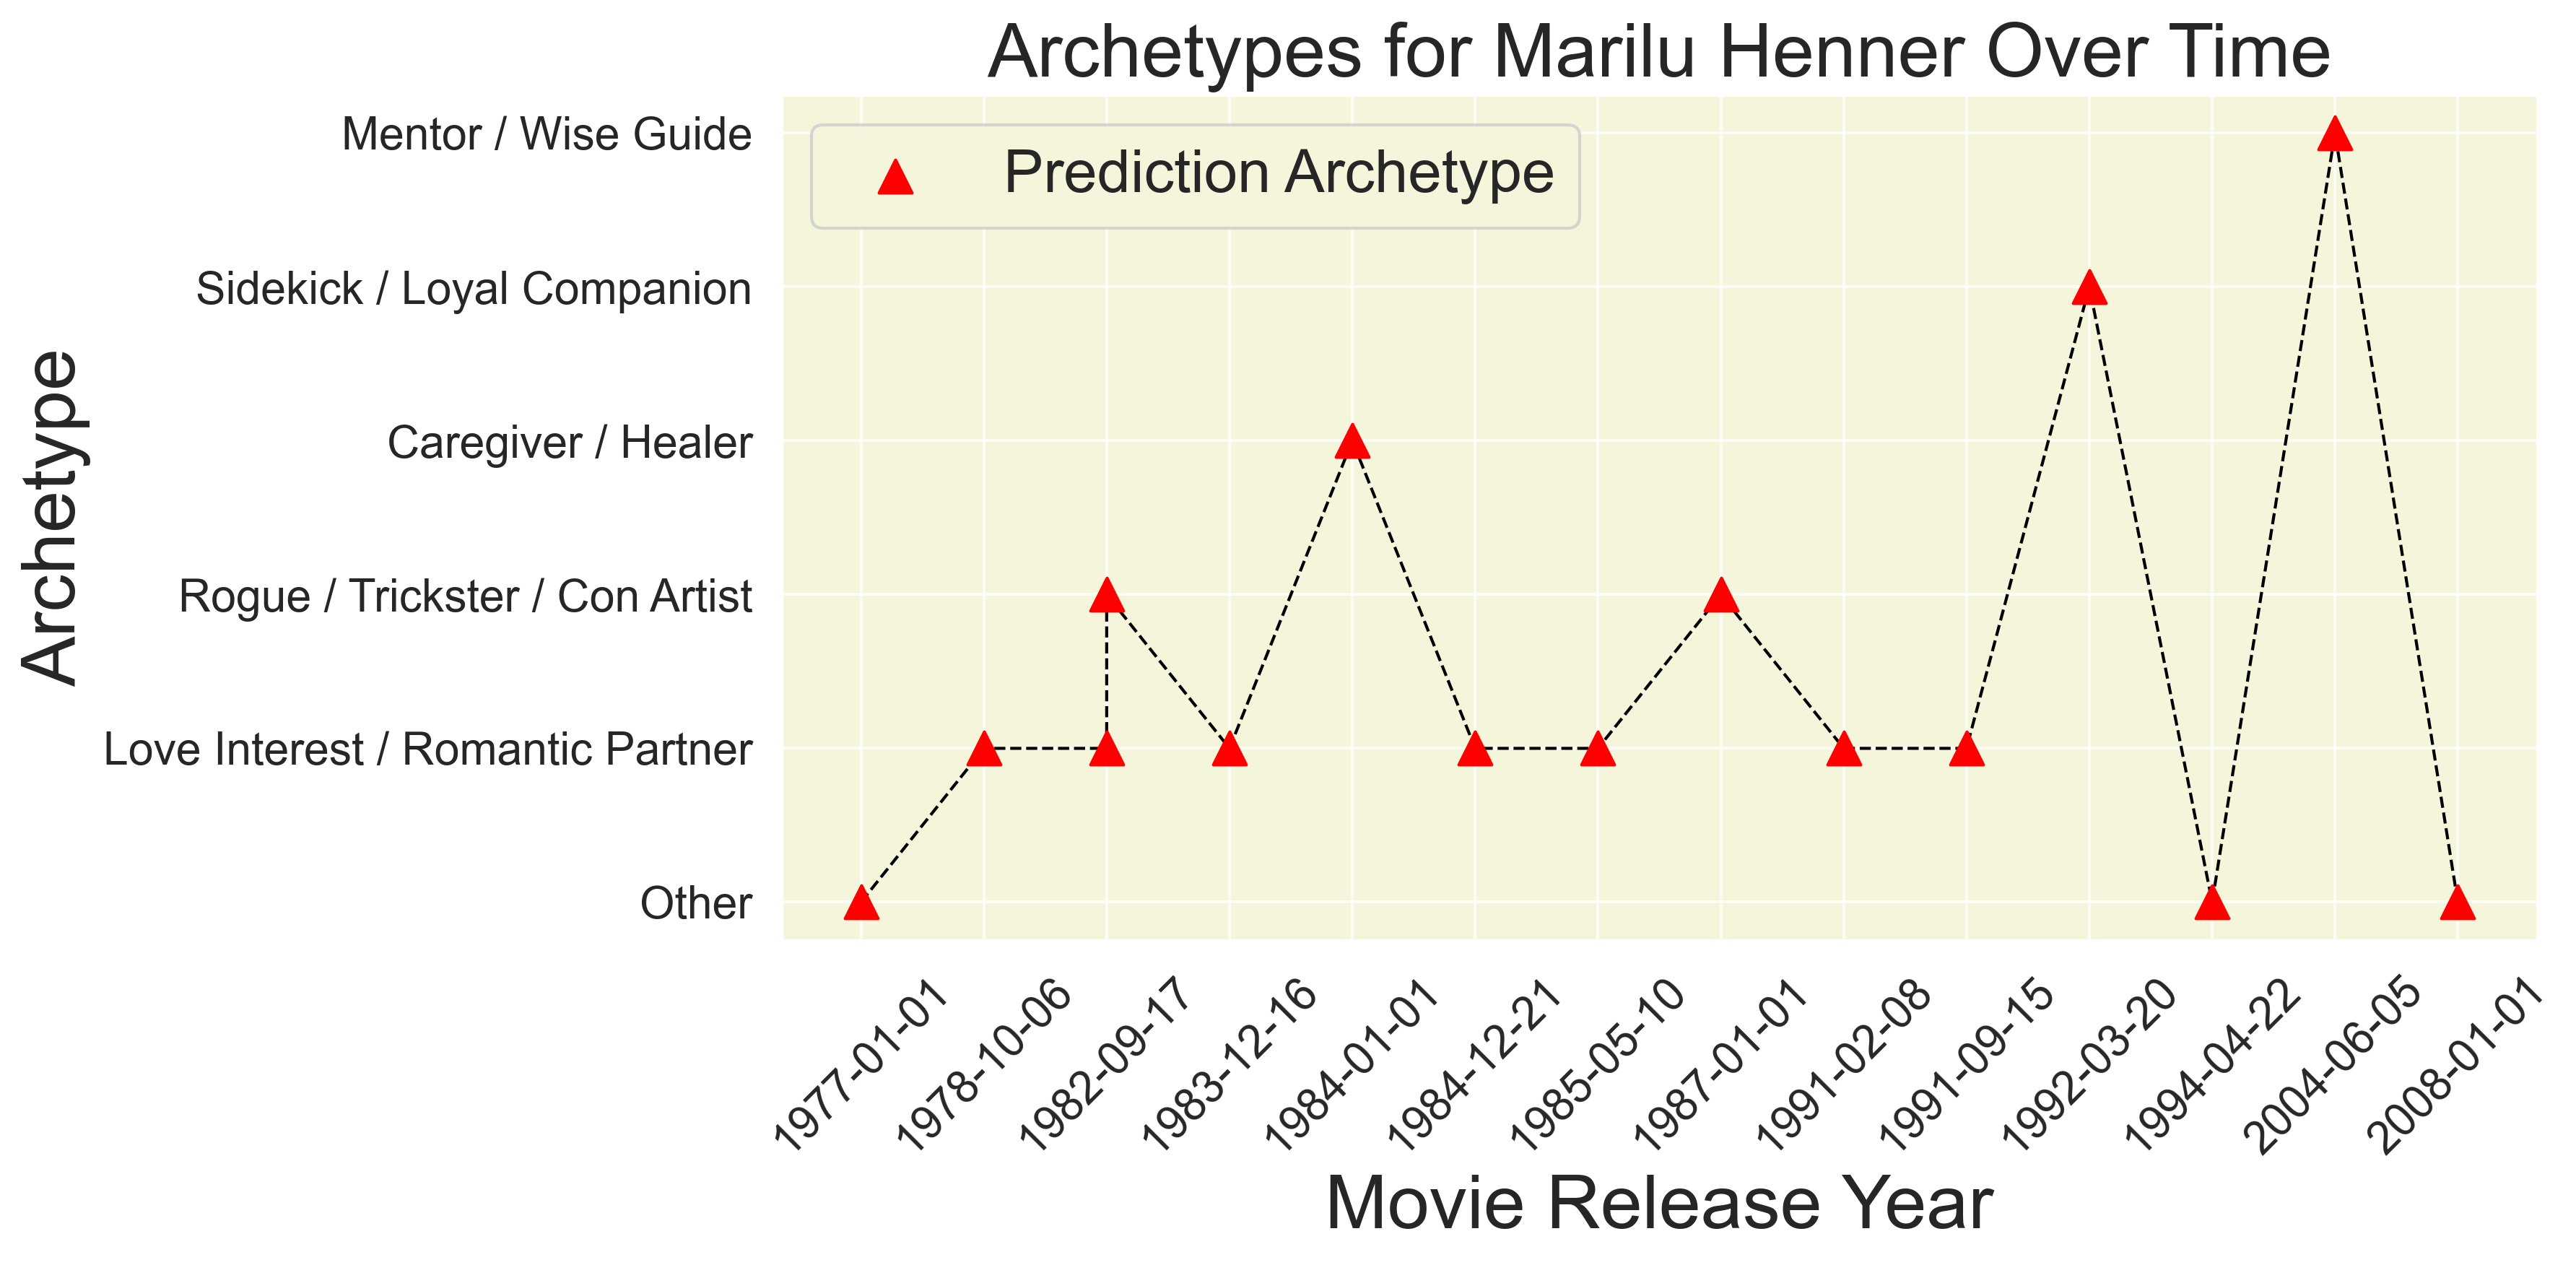

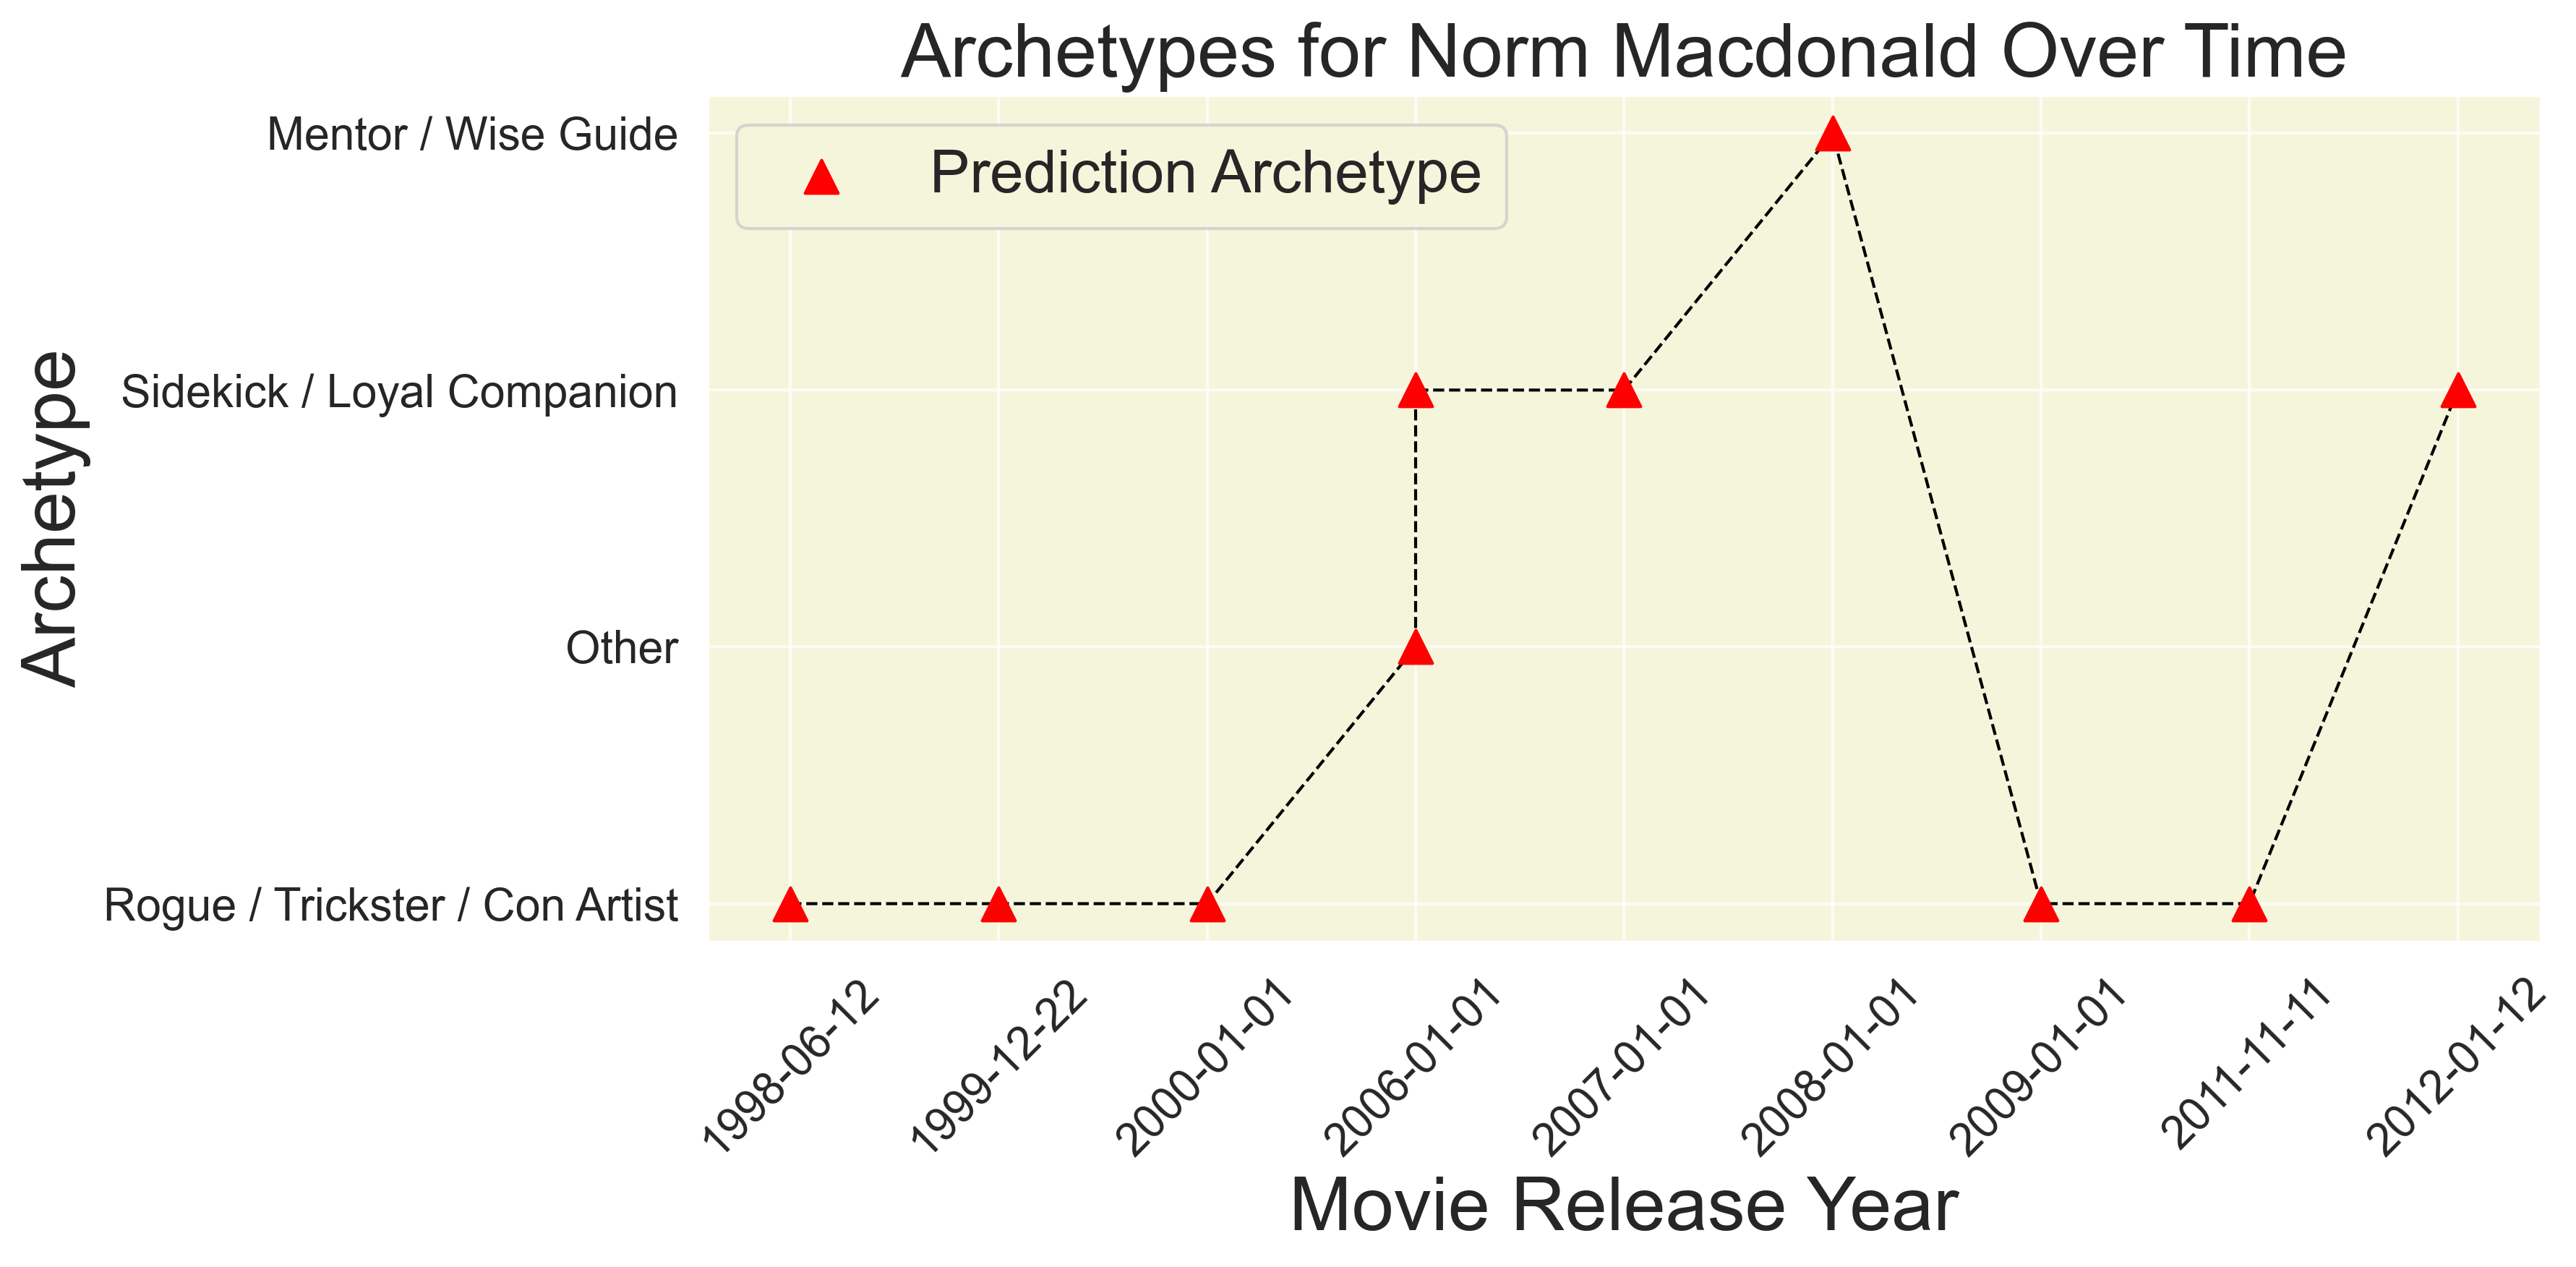

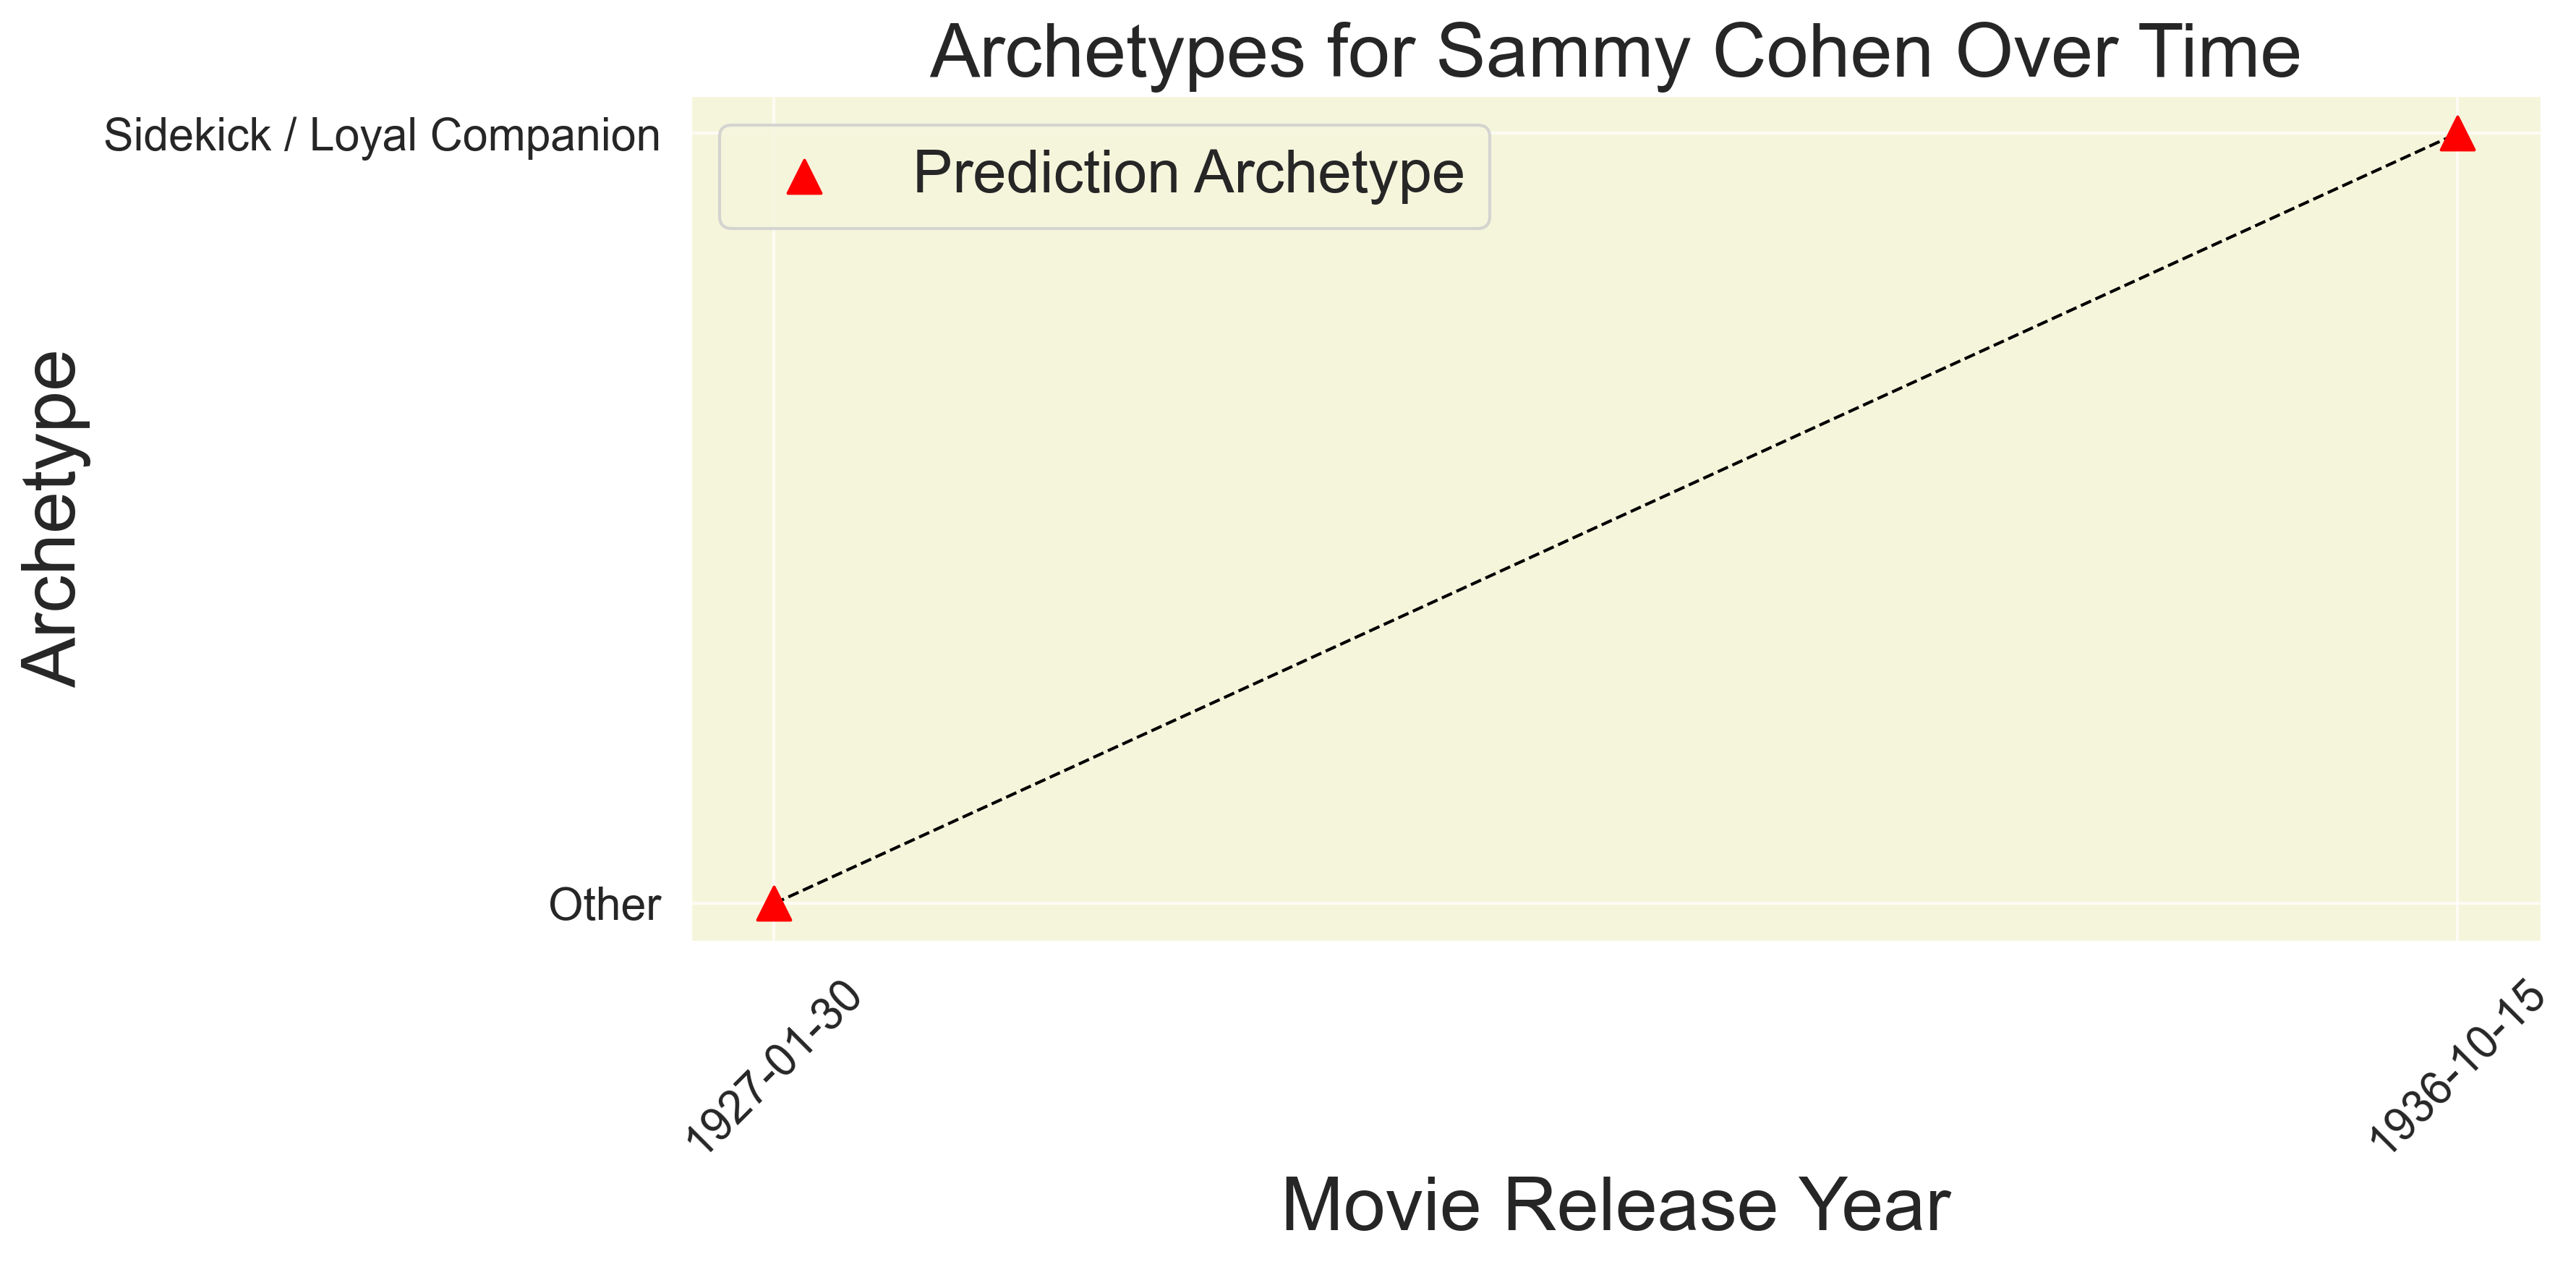

In [ ]:
# ignore
for fb_id in actor_fb_id_list[40:44]:
    plot_actor_archetypes(
        fb_id, 
        df_archetype=df_archetype_predictions_joined, 
        df_movie=df_movie_processed,
        df_character=df_character_processed
    )